In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import time 
import scipy
import investpy
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# Import data

In [2]:
ft = yf.download("LST.BK VPO.BK UVAN.BK UPOIC.BK ZM=F ZL=F ZS=F",start="2010-01-02",end="2020-08-31")
ft.fillna(method='bfill', inplace=True)
ft = ft.dropna()
ft = ft['Adj Close']
ft.head()

[*********************100%***********************]  7 of 7 completed


,LST.BK,UPOIC.BK,UVAN.BK,VPO.BK,ZL=F,ZM=F,ZS=F
Date,,,,,,,
2010-01-04,2.248110,4.029177,0.253351,2.881667,40.900002,316.000000,1049.50
2010-01-05,2.211851,4.029177,0.250262,2.881667,40.709999,319.399994,1052.25
2010-01-06,2.236023,4.060171,0.250262,2.881667,40.669998,317.899994,1050.50
2010-01-07,2.211851,4.029177,0.248717,2.881667,39.990002,307.000000,1017.75
2010-01-08,2.211851,4.029177,0.250262,2.881667,39.529999,306.799988,1013.00


In [3]:
st = yf.download("PTTEP.BK TVO.BK SCC.BK BTS.BK TNPC.BK",start="2010-01-02",end="2020-08-31")
st.fillna(method='bfill', inplace=True)
st = st.dropna()
st = st['Adj Close']
st.head()

[*********************100%***********************]  5 of 5 completed


,BTS.BK,PTTEP.BK,SCC.BK,TNPC.BK,TVO.BK
Date,,,,,
2010-01-04,2.281962,91.686096,159.190170,0.380774,8.899861
2010-01-05,2.281962,92.628090,159.190170,0.380774,8.899861
2010-01-06,2.243924,93.570053,157.140518,0.380774,8.949582
2010-01-07,2.243924,92.628090,154.407623,0.380774,8.999301
2010-01-08,2.243924,93.256287,155.090866,0.380774,9.049023


In [30]:
PTT = ft.join(st['TVO.BK'])
PTT = PTT.dropna()
PTT 

,LST.BK,UPOIC.BK,UVAN.BK,VPO.BK,ZL=F,ZM=F,ZS=F,TVO.BK
Date,,,,,,,,
2010-01-04,2.248110,4.029177,0.253351,2.881667,40.900002,316.000000,1049.50,8.899861
2010-01-05,2.211851,4.029177,0.250262,2.881667,40.709999,319.399994,1052.25,8.899861
2010-01-06,2.236023,4.060171,0.250262,2.881667,40.669998,317.899994,1050.50,8.949582
2010-01-07,2.211851,4.029177,0.248717,2.881667,39.990002,307.000000,1017.75,8.999301
2010-01-08,2.211851,4.029177,0.250262,2.881667,39.529999,306.799988,1013.00,9.049023
...,...,...,...,...,...,...,...,...
2020-08-24,4.340000,3.200000,4.422586,0.360000,31.660000,289.100006,899.75,27.250000
2020-08-25,4.340000,3.420000,4.500862,0.360000,31.980000,291.600006,913.75,27.250000
2020-08-26,4.400000,3.260000,4.540000,0.350000,32.240002,291.500000,919.50,28.000000


In [5]:
# df = pd.read_csv('BZ=F.csv')
# df = df.rename(columns={'วันเดือนปี' : 'Date','ล่าสุด' : 'BZ=F'})
# df = df[['BZ=F']]

# PTT = PTT.merge(df)
# PTT

# Visualize the Time Series

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


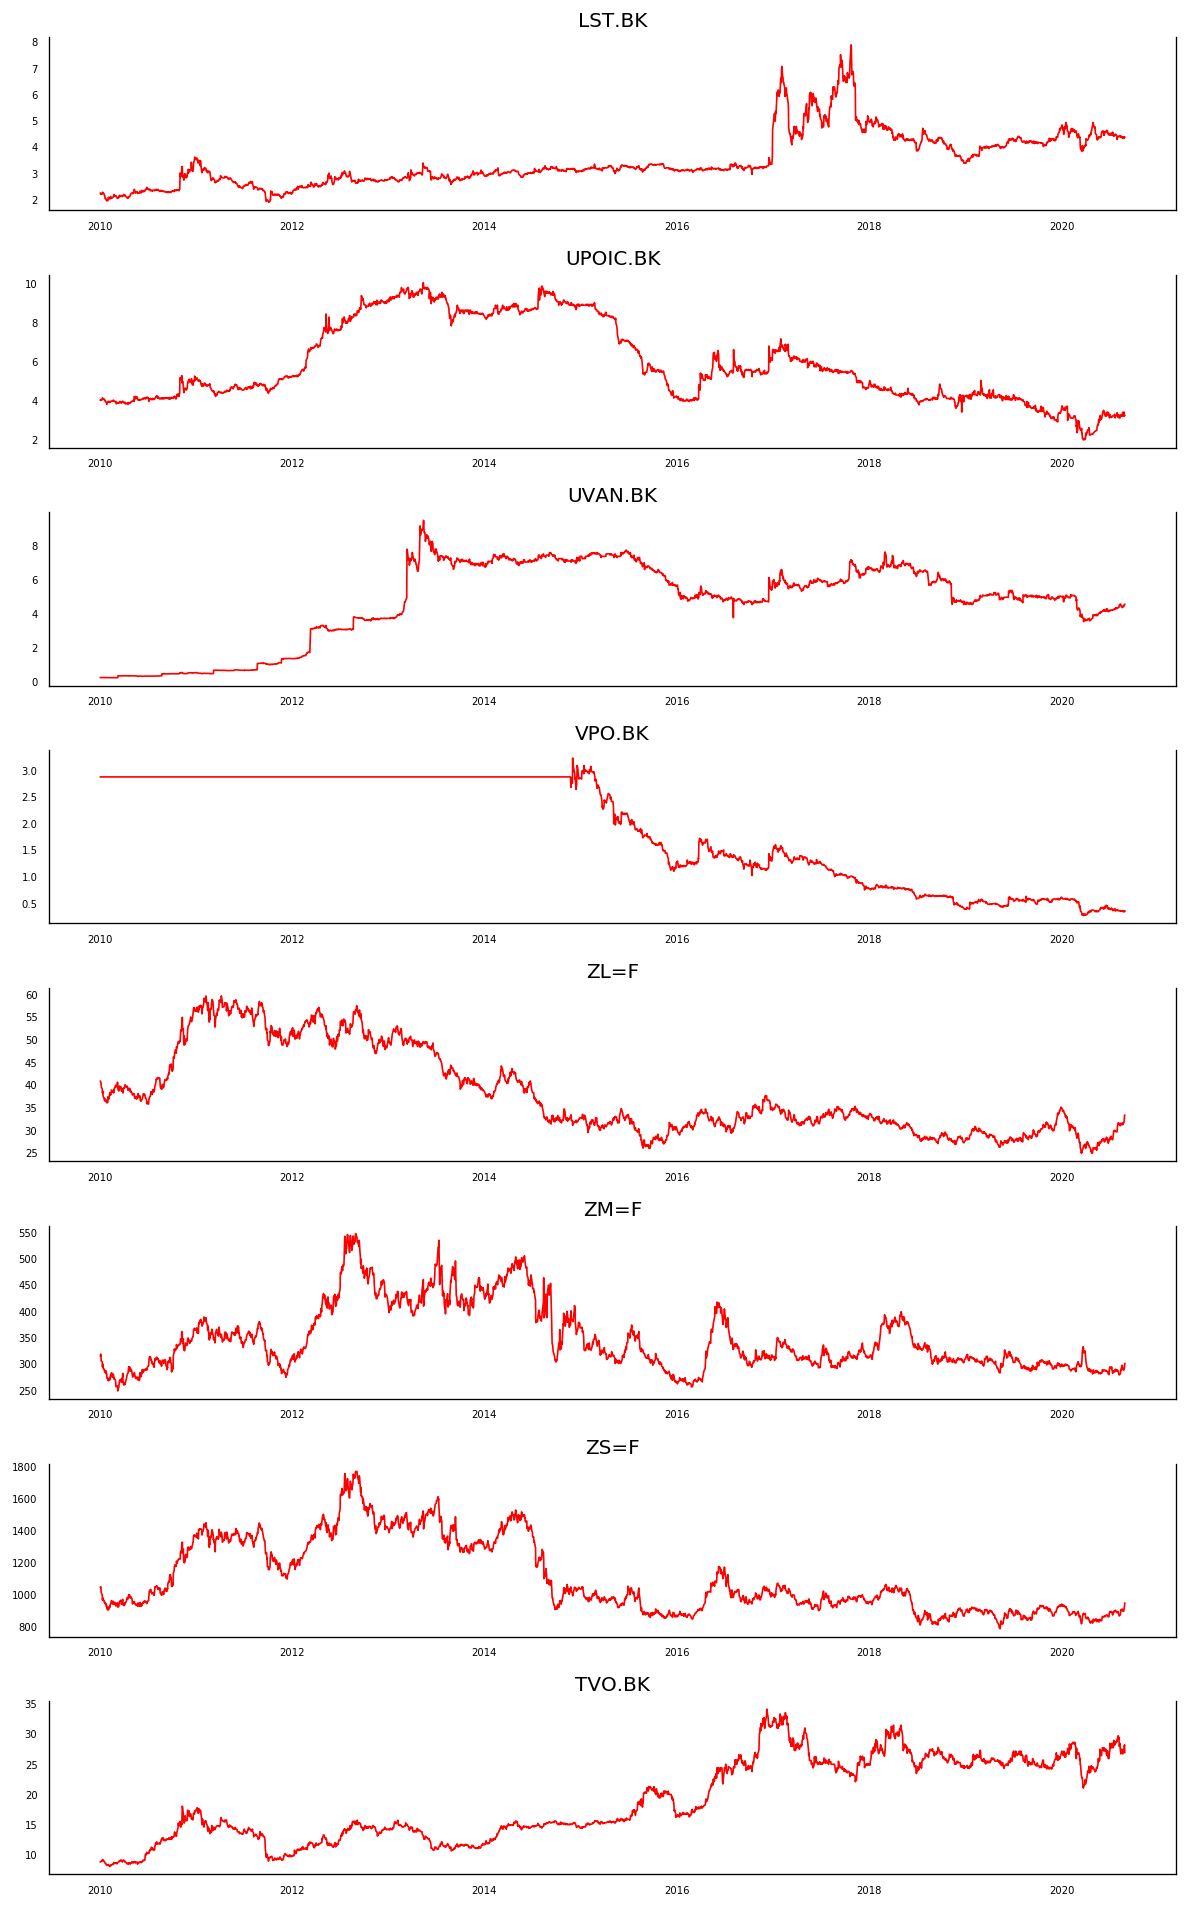

In [6]:
fig, axes = plt.subplots(nrows=len(PTT.columns), ncols=1, dpi=120, figsize=(10,16))
for i, ax in enumerate(axes.flatten()):
    data = PTT[PTT.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(PTT.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Correlation

In [7]:
PTT.corr()

,LST.BK,UPOIC.BK,UVAN.BK,VPO.BK,ZL=F,ZM=F,ZS=F,TVO.BK
LST.BK,1.000000,-0.273631,0.431768,-0.729648,-0.546509,-0.283545,-0.478956,0.803942
UPOIC.BK,-0.273631,1.000000,0.460673,0.636573,0.330137,0.758546,0.636206,-0.440897
UVAN.BK,0.431768,0.460673,1.000000,-0.287573,-0.541933,0.241858,-0.158945,0.355235
VPO.BK,-0.729648,0.636573,-0.287573,1.000000,0.753194,0.538134,0.737097,-0.894137
ZL=F,-0.546509,0.330137,-0.541933,0.753194,1.000000,0.508817,0.859369,-0.645396
ZM=F,-0.283545,0.758546,0.241858,0.538134,0.508817,1.000000,0.863992,-0.365915
ZS=F,-0.478956,0.636206,-0.158945,0.737097,0.859369,0.863992,1.000000,-0.582312
TVO.BK,0.803942,-0.440897,0.355235,-0.894137,-0.645396,-0.365915,-0.582312,1.000000


# Testing Causation using Granger’s Causality Test

In [8]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=24
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    PTT = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in PTT.columns:
        for r in PTT.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            PTT.loc[r, c] = min_p_value
    PTT.columns = [var + '_x' for var in variables]
    PTT.index = [var + '_y' for var in variables]
    return PTT

grangers_causation_matrix(PTT, variables = PTT.columns)   

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, bu

,LST.BK_x,UPOIC.BK_x,UVAN.BK_x,VPO.BK_x,ZL=F_x,ZM=F_x,ZS=F_x,TVO.BK_x
LST.BK_y,1.0000,0.0006,0.0000,0.0044,0.1352,0.3137,0.1511,0.0001
UPOIC.BK_y,0.0001,1.0000,0.0032,0.0031,0.0006,0.0013,0.0002,0.0242
UVAN.BK_y,0.4351,0.0050,1.0000,0.3420,0.0808,0.0629,0.0132,0.0482
VPO.BK_y,0.0009,0.1474,0.0225,1.0000,0.0117,0.0583,0.0772,0.0980
ZL=F_y,0.2085,0.0616,0.0011,0.4523,1.0000,0.0100,0.0330,0.2031
ZM=F_y,0.4130,0.0173,0.3478,0.0519,0.0142,1.0000,0.0009,0.1003
ZS=F_y,0.2812,0.4193,0.0388,0.0798,0.0011,0.0000,1.0000,0.0797
TVO.BK_y,0.0350,0.1586,0.7242,0.0053,0.0000,0.0003,0.0000,1.0000


# Cointegration Test

In [9]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(PTT, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(PTT,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(PTT.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(PTT)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
LST.BK ::  165.68    > 143.6691  =>   True
UPOIC.BK ::  118.44    > 111.7797  =>   True
UVAN.BK ::  85.68     > 83.9383   =>   True
VPO.BK ::  60.09     > 60.0627   =>   True
ZL=F   ::  38.77     > 40.1749   =>   False
ZM=F   ::  18.82     > 24.2761   =>   False
ZS=F   ::  6.67      > 12.3212   =>   False
TVO.BK ::  0.04      > 4.1296    =>   False


# Split the Series into Training and Testing Data

In [10]:
nobs = 7
ft_train, ft_test = PTT[0:-nobs], PTT[-nobs:]

# Check size
print(ft_train.shape)  
print(ft_test.shape)  
ft_train

(2596, 8)
(7, 8)


,LST.BK,UPOIC.BK,UVAN.BK,VPO.BK,ZL=F,ZM=F,ZS=F,TVO.BK
Date,,,,,,,,
2010-01-04,2.248110,4.029177,0.253351,2.881667,40.900002,316.000000,1049.50,8.899861
2010-01-05,2.211851,4.029177,0.250262,2.881667,40.709999,319.399994,1052.25,8.899861
2010-01-06,2.236023,4.060171,0.250262,2.881667,40.669998,317.899994,1050.50,8.949582
2010-01-07,2.211851,4.029177,0.248717,2.881667,39.990002,307.000000,1017.75,8.999301
2010-01-08,2.211851,4.029177,0.250262,2.881667,39.529999,306.799988,1013.00,9.049023
...,...,...,...,...,...,...,...,...
2020-08-13,4.440000,3.220000,4.540000,0.370000,31.600000,290.100006,907.25,26.750000
2020-08-14,4.380000,3.280000,4.442155,0.360000,31.530001,289.700012,903.50,27.500000
2020-08-17,4.400000,3.200000,4.422586,0.360000,31.299999,298.299988,912.50,27.250000


# Check for Stationarity and Make the Time Series Stationary

In [11]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [12]:
# ADF Test on each column
for name, column in ft_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LST.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6719
 No. Lags Chosen       = 22
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.079. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "UPOIC.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.8945
 No. Lags Chosen       = 7
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.7898. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "UVAN.BK" 
    -----------------------------------------------
 Null Hypothesis: Data ha

In [13]:
# 1st difference
ft_differenced = ft_train.diff().dropna()

In [14]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in ft_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LST.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.1656
 No. Lags Chosen       = 21
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "UPOIC.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -19.0204
 No. Lags Chosen       = 6
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "UVAN.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Leve

In [15]:
# # Second Differencing
# ft_differenced = ft_differenced.diff().dropna()

In [16]:
# # ADF Test on each column of 2nd Differences Dataframe
# for name, column in ft_differenced.iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

# Select the Order (P) of VAR model

In [17]:
model = VAR(ft_differenced)
for i in list(range(1,24)):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Lag Order = 1
AIC :  -17.232019496760916
BIC :  -17.06934067707275
FPE :  3.282684293742139e-08
HQIC:  -17.173070078314407 

Lag Order = 2
AIC :  -17.212135891334896
BIC :  -16.90475539506291
FPE :  3.348613419685763e-08
HQIC:  -17.1007491930666 

Lag Order = 3
AIC :  -17.195748947833415
BIC :  -16.743574174880315
FPE :  3.403950203335197e-08
HQIC:  -17.031889356726683 

Lag Order = 4
AIC :  -17.17346046125445
BIC :  -16.576398715338435
FPE :  3.4806926198391135e-08
HQIC:  -16.95709232622247 

Lag Order = 5
AIC :  -17.158135975982532
BIC :  -16.416094464500098
FPE :  3.534479080673111e-08
HQIC:  -16.889223607813005 

Lag Order = 6
AIC :  -17.143061798978806
BIC :  -16.255947632867333
FPE :  3.588215880017417e-08
HQIC:  -16.821569470278547 

Lag Order = 7
AIC :  -17.12367130809613
BIC :  -16.09139150169618
FPE :  3.658548315050424e-08
HQIC:  -16.74956325323556 

Lag Order = 8
AIC :  -17.097476177927682
BIC :  -15.919937648845062
FPE :  3.7557544883497945e-08
HQIC:  -16.670716592985208 


In [18]:
#Lag Order = 3
x = model.select_order(maxlags=4)
x.summary()

,AIC,BIC,FPE,HQIC
0,-17.16,-17.14*,3.532e-08,-17.15
1,-17.22*,-17.06,3.306e-08*,-17.17*
2,-17.21,-16.90,3.362e-08,-17.10
3,-17.19,-16.74,3.413e-08,-17.03
4,-17.17,-16.58,3.481e-08,-16.96


# Train the VAR Model of Selected Order(p)

In [19]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 30, Oct, 2020
Time:                     08:59:33
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -17.0693
Nobs:                     2594.00    HQIC:                  -17.1731
Log likelihood:          -7023.88    FPE:                3.28268e-08
AIC:                     -17.2320    Det(Omega_mle):     3.19298e-08
--------------------------------------------------------------------
Results for equation LST.BK
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.000805         0.001678            0.480           0.631
L1.LST.BK          -0.028308         0.020211           -1.401           0.161
L1.UPOIC.BK         0.034801         0.015858            2.195     

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [20]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(PTT.columns, out):
    print( col,':', round(val, 2))

LST.BK : 2.01
UPOIC.BK : 2.03
UVAN.BK : 2.0
VPO.BK : 2.01
ZL=F : 2.0
ZM=F : 2.0
ZS=F : 1.99
TVO.BK : 2.01


# Forecast VAR model using statsmodels

In [21]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = ft_differenced.values[-lag_order:]
forecast_input

1


array([[ 0.        ,  0.13999987, -0.01956892,  0.        ,  0.09000015,
        -0.5       ,  0.5       , -0.25      ]])

In [22]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
ft_forecast = pd.DataFrame(fc, index=PTT.index[-nobs:], columns=PTT.columns + '_1d')
ft_forecast


,LST.BK_1d,UPOIC.BK_1d,UVAN.BK_1d,VPO.BK_1d,ZL=F_1d,ZM=F_1d,ZS=F_1d,TVO.BK_1d
Date,,,,,,,,
2020-08-20,0.002755,-0.031380,0.009812,-0.000102,0.020771,0.045903,0.176105,0.007576
2020-08-21,0.000045,0.006374,0.000039,-0.001215,-0.004990,-0.049073,-0.088013,0.009276
2020-08-24,0.001055,-0.001721,0.001892,-0.000919,-0.003205,-0.001112,-0.044708,0.006531
2020-08-25,0.000794,0.000043,0.001527,-0.000978,-0.003505,-0.010507,-0.054607,0.007204
2020-08-26,0.000855,-0.000345,0.001602,-0.000966,-0.003464,-0.008840,-0.053474,0.007049
2020-08-27,0.000841,-0.000259,0.001586,-0.000968,-0.003472,-0.009189,-0.053671,0.007082
2020-08-28,0.000844,-0.000278,0.001589,-0.000968,-0.003470,-0.009112,-0.053626,0.007075


# Invert the transformation to get the real forecast

In [23]:
def invert_transformation(ft_train, ft_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    ft_fc = ft_forecast.copy()
    columns = ft_train.columns
    for col in columns:        
        # Roll back 2nd Diff
#         if second_diff:
#             ft_fc[str(col)+'_1d'] = (ft_train[col].iloc[-1]-ft_train[col].iloc[-2]) + ft_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        ft_fc[str(col)+'_forecast'] = ft_train[col].iloc[-1] + ft_fc[str(col)+'_1d'].cumsum()
    return ft_fc

In [24]:
ft_results = invert_transformation(ft_train, ft_forecast, second_diff=True)        
ft_results.loc[:, ["LST.BK_forecast" ,"UPOIC.BK_forecast", "UVAN.BK_forecast", "VPO.BK_forecast" ,"ZL=F_forecast","ZM=F_forecast","ZS=F_forecast","TVO.BK_forecast" ]]

,LST.BK_forecast,UPOIC.BK_forecast,UVAN.BK_forecast,VPO.BK_forecast,ZL=F_forecast,ZM=F_forecast,ZS=F_forecast,TVO.BK_forecast
Date,,,,,,,,
2020-08-20,4.402756,3.308620,4.373692,0.369898,31.690771,295.745915,912.676105,27.257576
2020-08-21,4.402801,3.314994,4.373730,0.368683,31.685781,295.696842,912.588092,27.266852
2020-08-24,4.403856,3.313273,4.375622,0.367764,31.682577,295.695729,912.543384,27.273383
2020-08-25,4.404650,3.313316,4.377149,0.366785,31.679072,295.685223,912.488777,27.280587
2020-08-26,4.405505,3.312971,4.378751,0.365820,31.675608,295.676383,912.435302,27.287636
2020-08-27,4.406346,3.312712,4.380337,0.364851,31.672136,295.667194,912.381632,27.294718
2020-08-28,4.407191,3.312434,4.381927,0.363883,31.668666,295.658082,912.328006,27.301793


# Plot of Forecast vs Actuals

Forecast Accuracy of: TVO
mape (Mean absolute percentage error) :  1.3144
mae (Mean Absolute Error) :  0.364
rmse (Root Mean Square Error) :  0.5029
mase (Mean absolute scaled error) :  1.6156


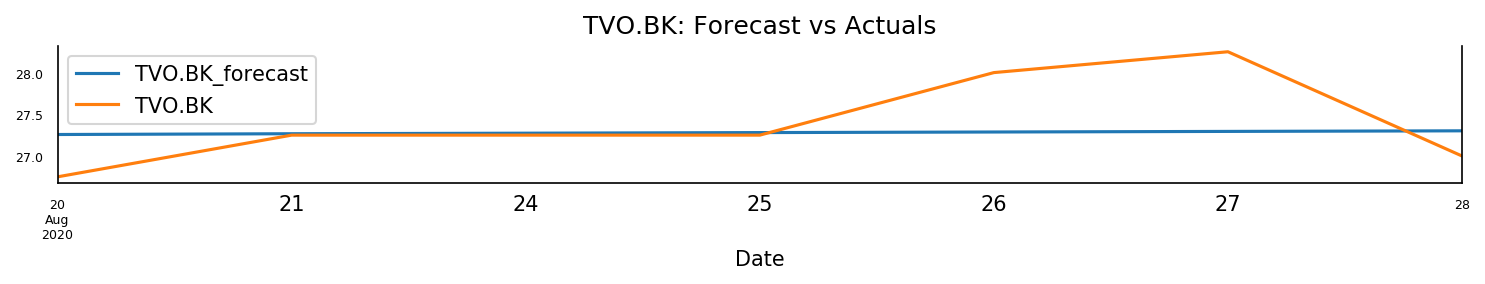

In [25]:


fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(10,2))
# fig, axes = plt.subplots(nrows=int(len(PTT.columns)), ncols=1, dpi=150, figsize=(10,10))

# for i, (col,ax) in enumerate(zip(PTT.columns, axes.flatten())):

ft_results['TVO.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
ft_test['TVO.BK'][-nobs:].plot(legend=True );
axes.set_title('TVO.BK' + ": Forecast vs Actuals")
axes.xaxis.set_ticks_position('none')
axes.yaxis.set_ticks_position('none')
axes.spines["top"].set_alpha(0)
axes.tick_params(labelsize=6)

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual,train):
    
    n = train.shape[0]
    d = np.abs(  np.diff( train) ).sum()/(n-1)
    
    mase = np.mean(np.abs(actual - forecast ))/d
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape (Mean absolute percentage error)':mape*100,  'mae (Mean Absolute Error)': mae, 'rmse (Root Mean Square Error)':rmse, 'mase (Mean absolute scaled error)':mase })

print('Forecast Accuracy of: TVO')
accuracy_prod = forecast_accuracy(ft_results['TVO.BK_forecast'].values, ft_test['TVO.BK'],ft_train['TVO.BK'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

#     ft_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
#     ft_test[col][-nobs:].plot(legend=True, ax=ax);
#     ax.set_title(col + ": Forecast vs Actuals")
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

plt.tight_layout();



In [26]:
# PTT.tail()

In [27]:
# ft_results.tail()

# Evaluate the Forecasts

In [28]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape*100,  'mae': mae, 'rmse':rmse })

print('Forecast Accuracy of: TVO')
accuracy_prod = forecast_accuracy(ft_results['TVO.BK_forecast'].values, ft_test['TVO.BK'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: CC=F')
# accuracy_prod = forecast_accuracy(ft_results['CC=F_forecast'].values, ft_test['CC=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: KC=F')
# accuracy_prod = forecast_accuracy(ft_results['KC=F_forecast'].values, ft_test['KC=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: HG=F')
# accuracy_prod = forecast_accuracy(ft_results['HG=F_forecast'].values, ft_test['HG=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: PL=F')
# accuracy_prod = forecast_accuracy(ft_results['PL=F_forecast'].values, ft_test['PL=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: ALI=F')
# accuracy_prod = forecast_accuracy(ft_results['ALI=F_forecast'].values, ft_test['ALI=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: SI=F')
# accuracy_prod = forecast_accuracy(ft_results['SI=F_forecast'].values, ft_test['SI=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: GC=F')
# accuracy_prod = forecast_accuracy(ft_results['GC=F_forecast'].values, ft_test['GC=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: NG=F')
# accuracy_prod = forecast_accuracy(ft_results['NG=F_forecast'].values, ft_test['NG=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: CL=F')
# accuracy_prod = forecast_accuracy(ft_results['CL=F_forecast'].values, ft_test['CL=F'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# print('\nForecast Accuracy of: AAPL')
# accuracy_prod = forecast_accuracy(ft_results['AAPL_forecast'].values, ft_test['AAPL'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

Forecast Accuracy of: TVO
mape :  1.3144
mae :  0.364
rmse :  0.5029
